In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import itertools

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

## Assignment
Time Series of Furniture vs. Office Supplies

Determine which category has more number of sales - Furniture or Office Supplies?

In [5]:
furniture = df.loc[df['Category'] == 'Furniture']
ofc_sup = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, ofc_sup.shape

((2121, 21), (6026, 21))

We can see that there were way more number of sales from Office Supplies than from Furniture over the years.

2. Preprocess the data for Furniture and Visualize it

In [6]:
cols = df.columns
cols_to_drop = list(cols.drop(['Order Date','Sales']))
furniture_sales = furniture.drop(cols_to_drop,axis=1)
furniture_sales_sorted = furniture_sales.sort_values('Order Date')
furniture_sales_sorted = furniture_sales_sorted.groupby('Order Date')['Sales'].sum().reset_index()
furniture_date_index = furniture_sales_sorted.set_index('Order Date')
furniture_sales_ms = furniture_date_index['Sales'].resample('MS').mean()

3. Show the furniture sales data and office supplies sales data in a consolidated tabl
- Perform the data preprocessing
   - Drop the unwanted colowns
   - Select only order sales and date
   - Sort it by order_date
   - Sum the sales of each date using group_by function
   - use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp


In [12]:
cols = df.columns
cols

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [13]:
cols_to_drop = list(cols.drop(['Order Date','Sales']))
cols_to_drop

['Row ID',
 'Order ID',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Quantity',
 'Discount',
 'Profit']

In [14]:
ofc_sup_sales = ofc_sup.drop(cols_to_drop,axis=1)
ofc_sup_sales.head()

Order Date    Sales
2 2016-06-12   14.620
4 2015-10-11   22.368
6 2014-06-09    7.280
8 2014-06-09   18.504
9 2014-06-09  114.900

In [15]:
ofc_sup_sales_sorted = ofc_sup_sales.sort_values('Order Date')
ofc_sup_sales_sorted

Order Date    Sales
7980 2014-01-03   16.448
740  2014-01-04  272.736
739  2014-01-04   11.784
741  2014-01-04    3.540
1759 2014-01-05   19.536
...         ...      ...
5091 2017-12-30    3.024
1297 2017-12-30   20.720
908  2017-12-30   52.776
1296 2017-12-30   13.904
645  2017-12-30  209.300

[6026 rows x 2 columns]

In [16]:
ofc_sup_sales_sorted = ofc_sup_sales_sorted.groupby('Order Date')['Sales'].sum().reset_index()
ofc_sup_sales_sorted

Order Date     Sales
0    2014-01-03    16.448
1    2014-01-04   288.060
2    2014-01-05    19.536
3    2014-01-06   685.340
4    2014-01-07    10.430
...         ...       ...
1143 2017-12-26   814.594
1144 2017-12-27    13.248
1145 2017-12-28  1091.244
1146 2017-12-29   282.440
1147 2017-12-30   299.724

[1148 rows x 2 columns]

In [17]:
ofc_sup_date_index = ofc_sup_sales_sorted.set_index('Order Date')
ofc_sup_date_index

Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06   685.340
2014-01-07    10.430
...              ...
2017-12-26   814.594
2017-12-27    13.248
2017-12-28  1091.244
2017-12-29   282.440
2017-12-30   299.724

[1148 rows x 1 columns]

In [18]:
ofc_sup_sales_ms = ofc_sup_date_index['Sales'].resample('MS').mean()
ofc_sup_sales_ms

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

In [19]:
furniture = pd.DataFrame({'Order Date':furniture_sales_ms.index, 'Sales':furniture_sales_ms.values})
office = pd.DataFrame({'Order Date': ofc_sup_sales_ms.index, 'Sales': ofc_sup_sales_ms.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

Order Date  furniture_sales  office_sales
0 2014-01-01       480.194231    285.357647
1 2014-02-01       367.931600     63.042588
2 2014-03-01       857.291529    391.176318
3 2014-04-01       567.488357    464.794750
4 2014-05-01       432.049188    324.346545

4. Plot the furniture sales data and office supplies sales data in the same graph

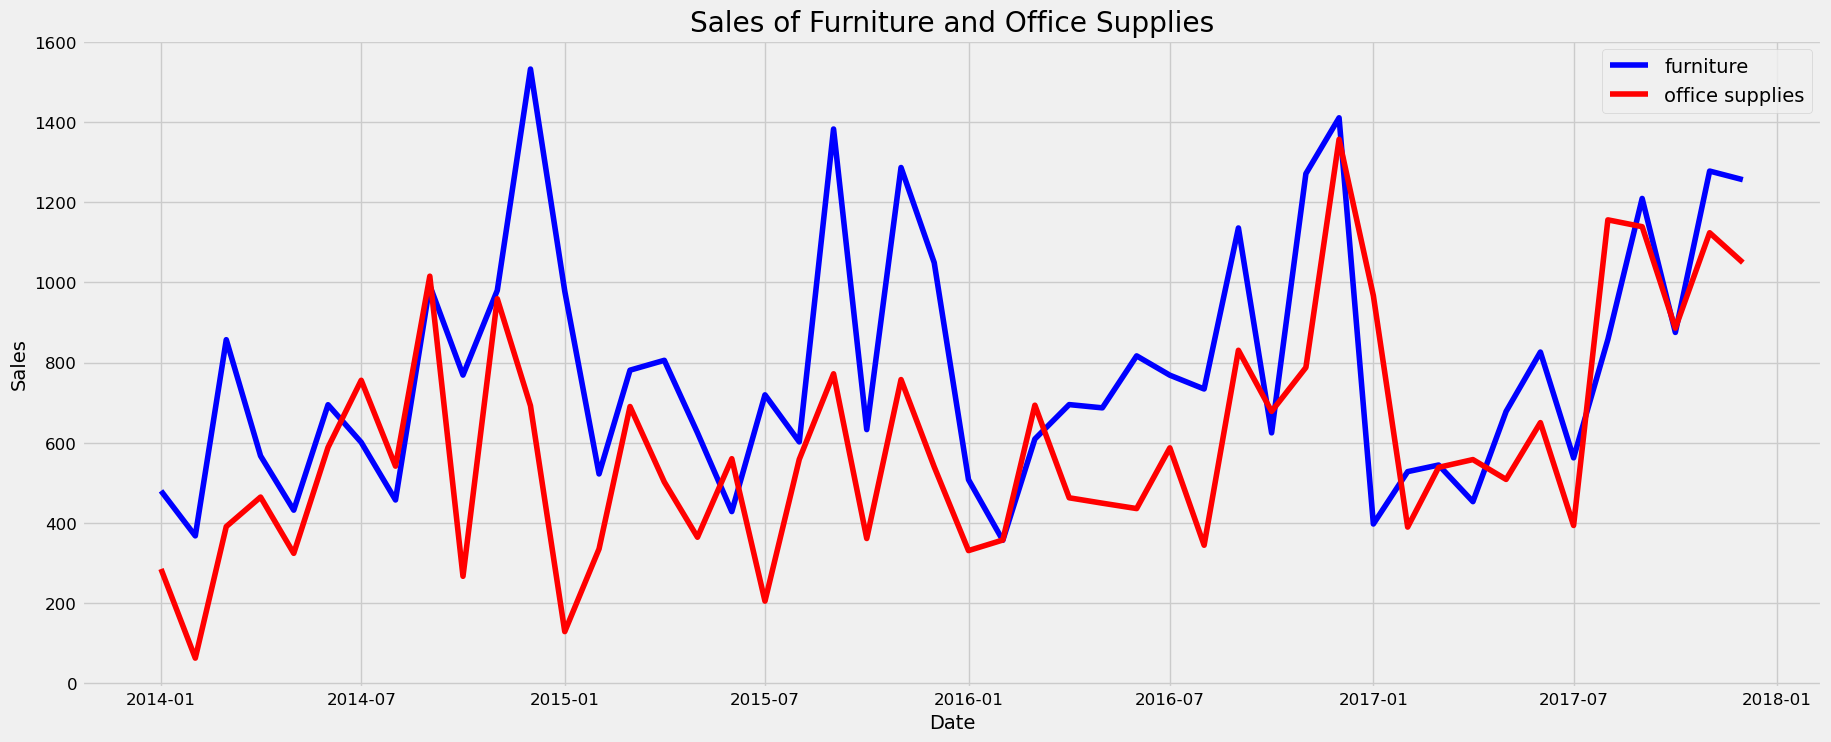

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

5. Do the seasonal decomposition for furniture

<Figure size 1500x800 with 0 Axes>

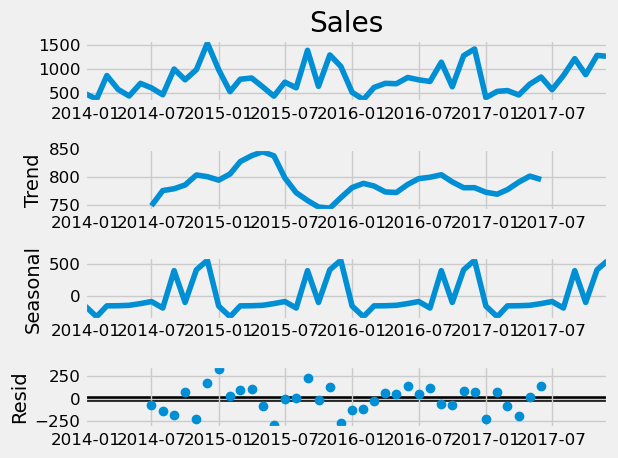

In [21]:
decomposition = sm.tsa.seasonal_decompose(furniture_sales_ms, model='additive')

plt.figure(figsize=(15,8))
fig = decomposition.plot()
plt.show()

In [23]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 1) x (0, 0, 1, 12)
ARIMA: (0, 0, 1) x (0, 1, 0, 12)
ARIMA: (0, 1, 0) x (0, 1, 1, 12)
ARIMA: (0, 1, 0) x (1, 0, 0, 12)


6. Do the forecasting for Furniture with ARIMA

In [24]:
param_list = []
param_seasonal_list = []
mse_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = ARIMA(furniture_sales_ms,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        param_list.append(param)
        param_seasonal_list.append(param_seasonal)
        mse_list.append(results.mse)
        print('ARIMA{}x{}12 - MSE:{}'.format(param, param_seasonal, results.mse))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MSE:92253.61286515486
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MSE:88845.70445381304
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MSE:196566.0520584646


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MSE:194153.04286563475
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MSE:61251.37016732056


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MSE:133242.54253410498
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MSE:199420.47692612457
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MSE:194216.14699924862
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MSE:88035.75101705441
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MSE:7.32764405602054e+30
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MSE:195962.13353583575
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MSE:194367.76762574445
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MSE:61103.64005454632


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MSE:2.2760558955343505e+30
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MSE:199077.01095719868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MSE:199178.447834185
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MSE:140052.44650501478


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MSE:140053.40998958706
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - MSE:111199.15677805331
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - MSE:105662.13770005573
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - MSE:96531.02912819308


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - MSE:654845.2778190731
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - MSE:103976.02926873631
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - MSE:106064.33087313698
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - MSE:102558.04697960154
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - MSE:6.513912993933765e+30
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - MSE:89486.01963283117


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - MSE:82538.58226268353
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - MSE:78887.89735191608


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - MSE:5.945049152922271e+30
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - MSE:86115.75204136047
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - MSE:82290.9743195398
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - MSE:87102.3683511913
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - MSE:57487126.41249009
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - MSE:194984.38370343615
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - MSE:187351.21281838
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - MSE:57379.88844034577


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - MSE:3389139066.5368524
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - MSE:192697.87628701376
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - MSE:191021.33826607405
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - MSE:88689.70239999676
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - MSE:6.106325770723923e+30
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - MSE:210898.1138303576


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - MSE:275650.30350594537
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - MSE:103420.45799711304


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - MSE:1.9059174592164427e+30
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - MSE:329369.207576359
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - MSE:367243.5531316108
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - MSE:116670.10225165162
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - MSE:133909402.78915155
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - MSE:96022.07564496272


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - MSE:91909.85925543292
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - MSE:80788.85328052648


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - MSE:255242864103.3151
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - MSE:88900.89820001625
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - MSE:87306.93010284253
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - MSE:97736.76946657001
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - MSE:1.4729179252178398e+94


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - MSE:88854.50383294381
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - MSE:82462.3256578566
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - MSE:78528.82844853667
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - MSE:4.408891620848905e+30


C:\Users\jainr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - MSE:87359.81068888771
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - MSE:82416.46473192856


In [25]:
mse_arr = np.array(mse_list)
mse_min = np.amin(mse_arr)
mse_min_idx = np.argmin(mse_arr)
print('Best MSE value: {}'.format(mse_min))
print('Best MSE Index: {}'.format(mse_min_idx))
optimal_order = param_list[mse_min_idx]
optimal_seasonal_order = param_seasonal_list[mse_min_idx]
print('Optimal Parameters: {} x {}'.format(optimal_order,optimal_seasonal_order))

Best MSE value: 57379.88844034577
Best MSE Index: 36
Optimal Parameters: (1, 0, 0) x (1, 0, 0, 12)


In [30]:
mod = ARIMA(furniture_sales_ms,order=optimal_order,seasonal_order=optimal_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        812.9810    142.945      5.687      0.000     532.814    1093.148
ar.L1          0.0736      0.168      0.439      0.661      -0.255       0.402
ar.S.L12       0.7324      0.129      5.681      0.000       0.480       0.985
sigma2      4.003e+04   1.06e+04      3.784      0.000    1.93e+04    6.08e+04


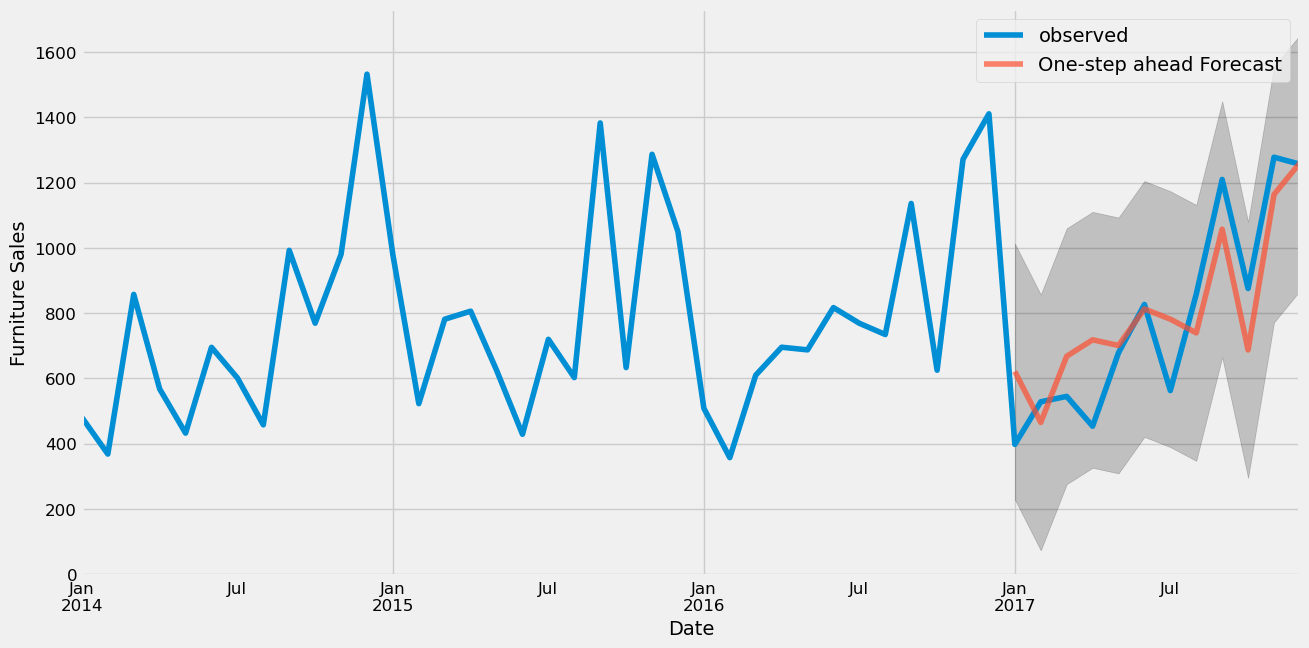

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = furniture_sales_ms['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

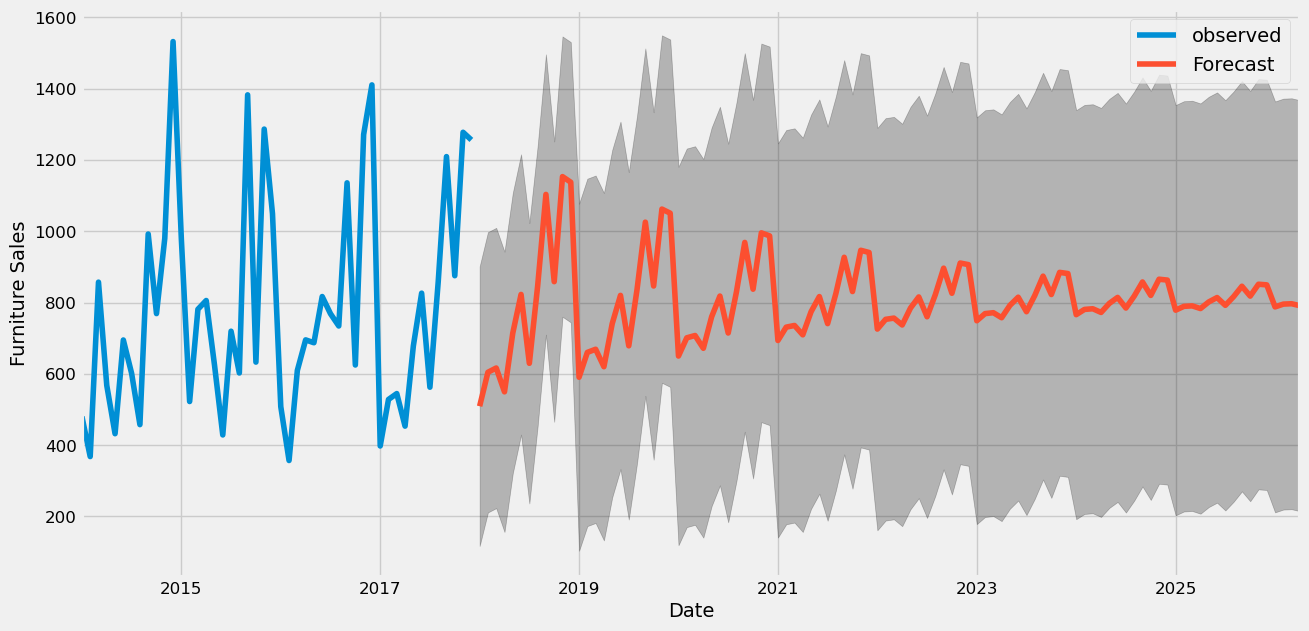

In [32]:
pred_fc_furniture = results.get_forecast(steps=100)
pred_ci = pred_fc_furniture.conf_int()
ax = furniture_sales_ms.plot(label='observed', figsize=(14, 7))
pred_fc_furniture.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()